In [1]:
%matplotlib inline
import os
import numpy as np
import scipy as sp
import scipy.optimize
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import rc
from astroML.plotting import setup_text_plots
import pdb
setup_text_plots(fontsize=25, usetex=True)

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
mpl.rcParams['font.size'] = 25.0

In [2]:
from jakely import colorize

In [3]:
def add_hexbin_points(ax,h,Nx,Ny,cval,ms=2.):    
    
    padfrac = 4.0
    counts = h.get_array()
    ncnts = np.count_nonzero(np.power(10,counts))
    verts = h.get_offsets()
    
    colors,scalarMap,cNorm = colorize(cval,cmap='Greys')
    N = len(cval)
    
    # Calculate distance between all verticies
    Nv = len(verts)
    x,y = verts[:,0],verts[:,1]
    dist = np.zeros([Nv,Nv])
    for i in range(Nv):
        for j in range(Nv):
            if i!=j:
                dist[i,j] = np.sqrt((x[i] - x[j])**2. + (y[i] - y[j])**2.)
            else:
                dist[i,j] = np.inf
            
    # Minimum distance / 2 = cell "radius"
    rad = (np.min(dist) / 2) + (np.min(dist) / padfrac)
    #print 'r =', rad

    # Calculate the distance between each vertex and all scatter points
    dist2 = np.zeros([Nv,N])
    for i in range(Nv):
        for j in range(N):
            dist2[i,j] = np.sqrt((x[i] - Nx[j])**2. + (y[i] - Ny[j])**2.)
        
    # For each vertex, check which scatter points lie within a circle of radius rad
    ptcolor = np.ones([Nv,4])
    for i in range(Nv):
        # isolate points within radius
        tmask = dist2[i,:] < rad
        # if there are no points in radius (there should be points!)
        if np.sum(tmask) == 0:
            # Set color to red for error
            ptcolor[i,:] = [1.0,0.0,0.0,1.0]
            print "Error: No points found in hexbin"
        # otherwise set color to median value of points within radius
        else: 
            ptcolor[i,:] = scalarMap.to_rgba(np.median(cval[tmask]))
    
    for offc in xrange(verts.shape[0]):
        binx,biny = verts[offc][0],verts[offc][1]
        if counts[offc]:
            ax.plot(binx,biny,'o',zorder=100, ms=ms, color=ptcolor[offc], markeredgecolor=ptcolor[offc])

In [75]:
def plot_hexbin_dots(x,y,z,ax=None,cbar_ax1=None,cbar_ax2=None,cmap_bin='Spectral_r', cmap_dots='Greys',\
                     dotsize=4., label_hex='N per bin', label_dots='Median Value per bin',\
                     gridsize=25, cbar1_orientation='horizontal',\
                     cbar2_orientation='vertical'): 
    
    # Create figure if axes not passed as kwargs
    if (ax==None) & (cbar_ax1==None) & (cbar_ax2==None):
        fig = plt.figure(figsize=(11,10))
        gs = gridspec.GridSpec(2,2, height_ratios=[.1,1], width_ratios=[1,.1]) 
        cbar_ax1 = plt.subplot(gs[0])
        cbar_ax1.set_xlabel(r"", labelpad=-100)
        cbar_ax2 = plt.subplot(gs[3])
        cbar_ax2.set_ylabel('', rotation=270, labelpad=25)
        ax = plt.subplot(gs[2])
        ret = True
    elif (ax==None) or (cbar_ax1==None) or (cbar_ax2==None):
        print "Error: Either pass all axes or none"
        return
    else:
        fig = ax.get_figure()
        ret = False
        pass
        
    
    alpha1 = 0.8
    
    # Set dot colors
    colors,scalarMap,cNorm = colorize(z,cmap=cmap_dots)
    
    # Create hexbins
    h0 = ax.hexbin(x,y, alpha=alpha1, cmap=cmap_bin,gridsize=gridsize, mincnt=1)
    
    # Add hexbin dots
    add_hexbin_points(ax, h0, x, y, z, ms=dotsize)
    
    # Set hexbin colorbar
    cb1 = fig.colorbar(h0, cax=cbar_ax1, orientation=cbar1_orientation)
    cb1.set_label(label_hex)
    # Set dot colorbar
    cb2 = mpl.colorbar.ColorbarBase(cbar_ax2, cmap=cmap_dots, norm=cNorm, orientation=cbar2_orientation)
    cb2.set_label(label_dots)
    
    # Return figure object if just created 
    if ret:
        return fig
    else:
        return

In [76]:
def generate_data(n):
    """Make random, correlated x & y arrays"""
    points = np.random.multivariate_normal(mean=(0,0),
        cov=[[0.4,9],[9,10]],size=int(n))
    return points

n = 1e4
points = generate_data(n)
N = 1000
Ndat = np.array([[np.random.randint(-20,20), np.random.randint(-20,20)] for i in range(N)])
x, y = Ndat[:,0], Ndat[:,1]
z = np.random.rand(N)

/astro/users/jlustigy/.conda/envs/my_root/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: covariance is not positive-semidefinite.


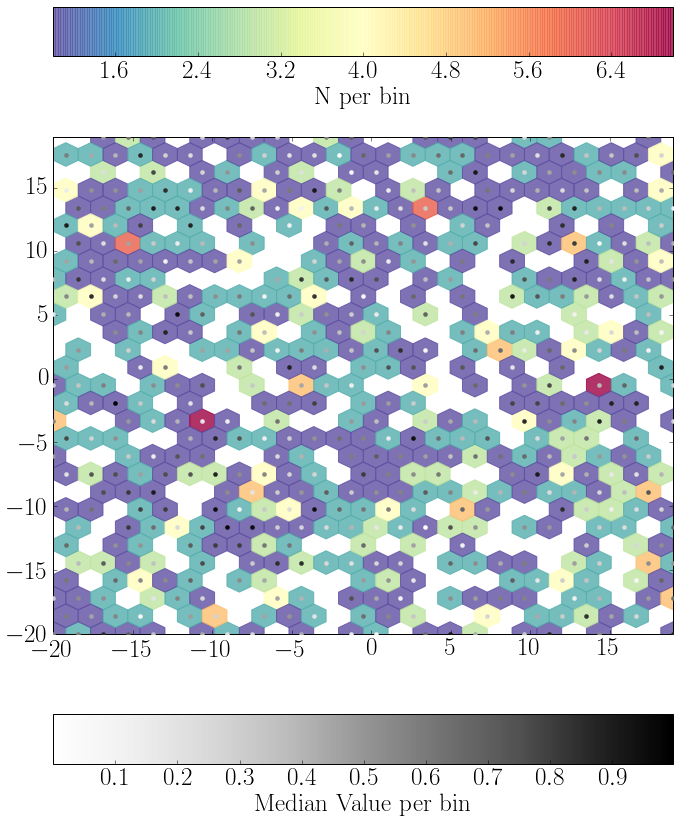

In [77]:
fig = plt.figure(figsize=(10,12))
gs = gridspec.GridSpec(3,1, height_ratios=[.1,1,.1]) 
cbar_ax1 = plt.subplot(gs[0])
cbar_ax2 = plt.subplot(gs[2])
ax0 = plt.subplot(gs[1])
plot_hexbin_dots(x,y,z,ax=ax0,cbar_ax1=cbar_ax1,cbar_ax2=cbar_ax2, cbar2_orientation='horizontal')
fig.tight_layout()

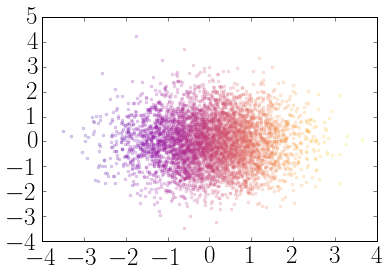

In [53]:
N=5000
x = np.random.normal(size=N)
y = np.random.normal(size=N)
z = 10*x
c, t1,t2 = colorize(z)

for i in range(N):
    plt.plot(x[i], y[i], '.', alpha=0.2, color=c[i])

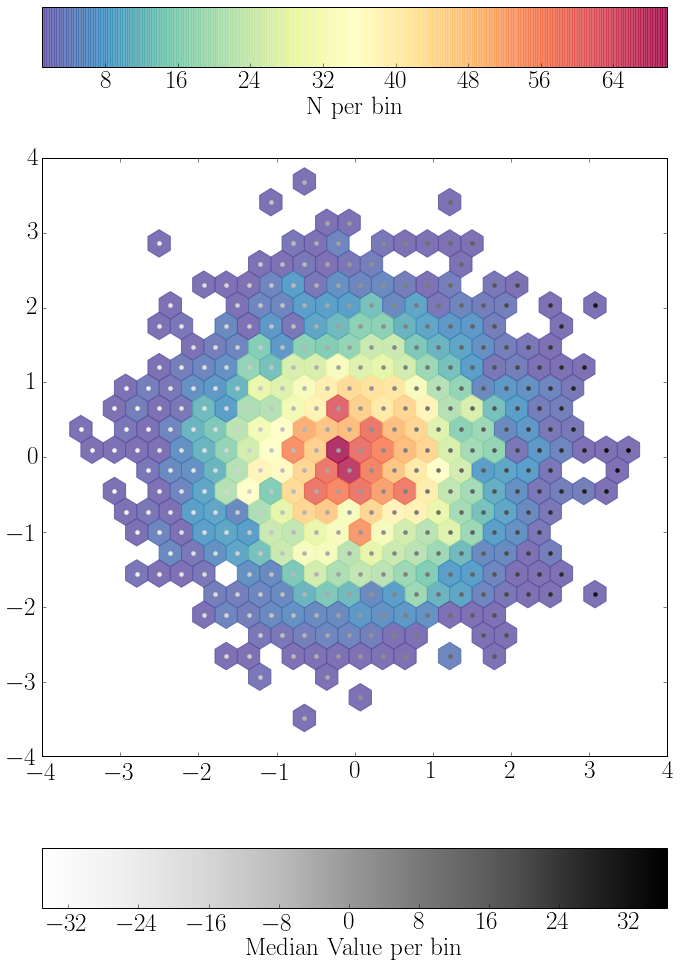

In [55]:
fig = plt.figure(figsize=(10,14))
gs = gridspec.GridSpec(3,1, height_ratios=[.1,1,.1]) 
cbar_ax1 = plt.subplot(gs[0])
cbar_ax2 = plt.subplot(gs[2])
ax0 = plt.subplot(gs[1])
ax0.set_ylim([-4,4])
ax0.set_xlim([-4,4])
plot_hexbin_dots(x,y,z,ax=ax0,cbar_ax1=cbar_ax1,cbar_ax2=cbar_ax2, cbar2_orientation='horizontal')
fig.tight_layout()

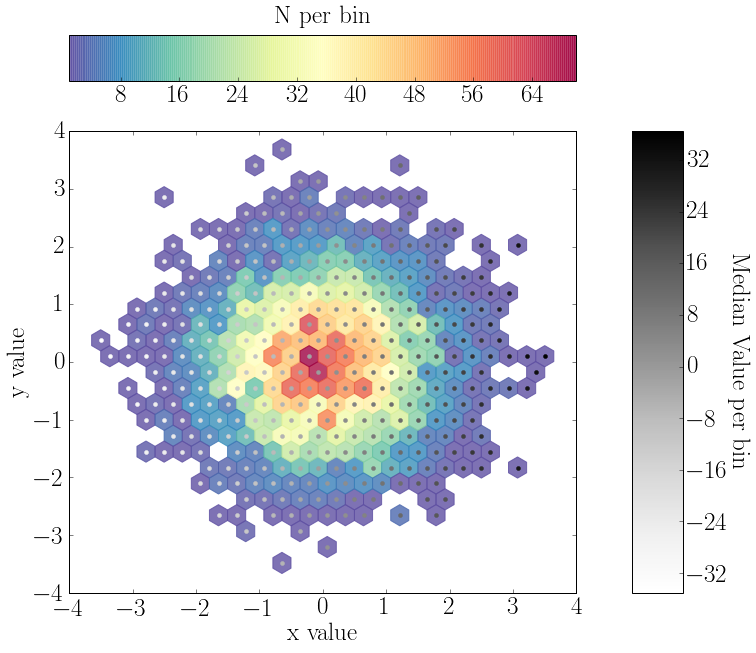

In [57]:
fig = plt.figure(figsize=(11,10))
gs = gridspec.GridSpec(2,2, height_ratios=[.1,1], width_ratios=[1,.1]) 
cbar_ax1 = plt.subplot(gs[0])
cbar_ax1.set_xlabel(r"", labelpad=-100)
cbar_ax2 = plt.subplot(gs[3])
cbar_ax2.set_ylabel('', rotation=270, labelpad=20)
ax0 = plt.subplot(gs[2])
ax0.set_ylim([-4,4])
ax0.set_xlim([-4,4])
ax0.set_xlabel('x value')
ax0.set_ylabel('y value')
plot_hexbin_dots(x,y,z,ax=ax0,cbar_ax1=cbar_ax1,cbar_ax2=cbar_ax2)
#fig.tight_layout()

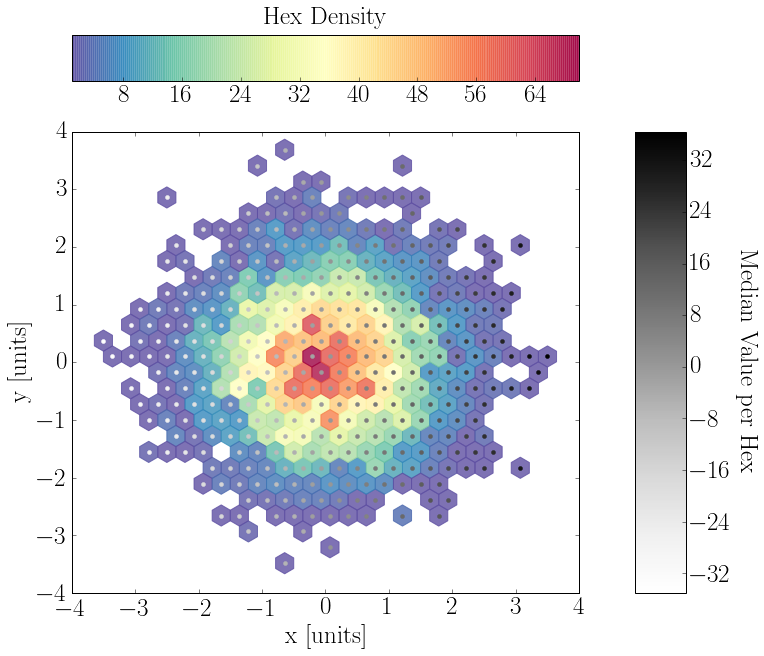

In [71]:
fig = plot_hexbin_dots(x,y,z, label_hex='Hex Density', label_dots='Median Value per Hex')
ax = fig.get_axes()[2]
ax.set_xlim([-4,4]); ax.set_ylim([-4,4])
ax.set_xlabel('x [units]'); ax.set_ylabel('y [units]') 